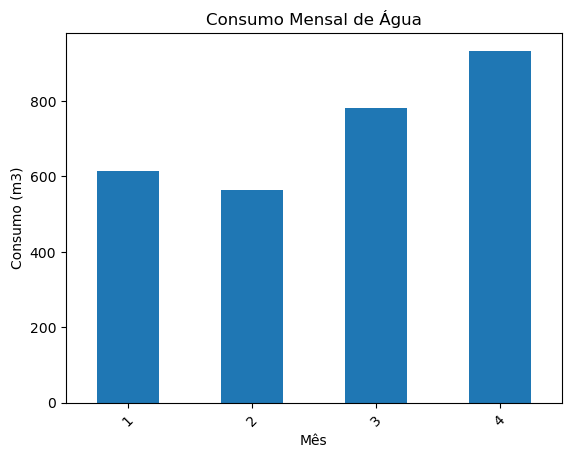

TypeError: '>' not supported between instances of 'str' and 'int'

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew

# Função para calcular custo de água
def calculate_water_cost(consumption):
    base_cost = 0.7
    if consumption > 1000:
        additional_cost = (consumption - 1000) * 0.7 * 0.15
        return base_cost * consumption + additional_cost
    else:
        return base_cost * consumption

# Carregar dados
data = pd.read_csv("water_consumption.csv", delimiter=";")

# Função para criar gráfico de barras mensal
def plot_monthly_consumption(data, park_id, year, start_month, end_month):
    filtered_data = data[(data['Park'] == park_id) &
                         (data['Year'] == year) &
                         (data['Month'] >= start_month) &
                         (data['Month'] <= end_month)].copy()

    # Convertendo o tipo de dados 'Consumption' para float
    filtered_data['Consumption'] = filtered_data['Consumption'].str.replace(',', '.').astype(float)

    monthly_consumption = filtered_data.groupby('Month')['Consumption'].sum()
    monthly_consumption.plot(kind='bar')
    plt.title('Consumo Mensal de Água')
    plt.xlabel('Mês')
    plt.ylabel('Consumo (m3)')
    plt.xticks(rotation=45)
    plt.show()

# Função para calcular custo médio mensal
def calculate_monthly_cost(data, park_id):
    park_data = data[data['Park'] == park_id]
    if park_data.empty:
        print(f"Não há dados para o parque {park_id}.")
        return None

    monthly_cost = park_data.groupby(['Year', 'Month'])['Consumption'].sum().apply(calculate_water_cost)
    monthly_cost_mean = monthly_cost.mean()
    return monthly_cost_mean

# Função para análise estatística
def statistical_analysis(data, park_id):
    park_data = data[data['Park'] == park_id]
    consumption_values = park_data['Consumption'].values
    mean = np.mean(consumption_values)
    median = np.median(consumption_values)
    std_dev = np.std(consumption_values)
    skewness = skew(consumption_values)
    print("Média:", mean)
    print("Mediana:", median)
    print("Desvio Padrão:", std_dev)
    print("Coeficiente de Assimetria:", skewness)

    # Construir tabelas de frequência
    classes = [0, 20, 40, 60, 80, 100]
    frequency, _ = np.histogram(consumption_values, bins=classes)
    relative_frequency = frequency / len(consumption_values)
    print("\nTabela de Frequência Absoluta:")
    for i in range(len(classes) - 1):
        print(f"{classes[i]} - {classes[i + 1]}: {frequency[i]}")
    print("\nTabela de Frequência Relativa:")
    for i in range(len(classes) - 1):
        print(f"{classes[i]} - {classes[i + 1]}: {relative_frequency[i]}")

    # Verificar outliers
    q1, q3 = np.percentile(consumption_values, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = [value for value in consumption_values if value < lower_bound or value > upper_bound]
    if outliers:
        print("\nOutliers encontrados:", outliers)
    else:
        print("\nNão foram encontrados outliers.")

# Testando as funções
plot_monthly_consumption(data, 'Oriental', 2023, 1, 4)
monthly_cost = calculate_monthly_cost(data, 'Oriental')
if monthly_cost is not None:
    print("Custo médio mensal do parque Oriental:", monthly_cost)
statistical_analysis(data, 'Oriental')
